In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('Social_Network_Ads.csv')

In [7]:
df = df.iloc[:,2:]


In [8]:
df.sample(5)

,Age,EstimatedSalary,Purchased
392,45,45000,1
355,60,34000,1
283,52,21000,1
79,26,17000,0
225,37,53000,0


In [16]:

# <!-- Train test split -->
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased',
                                                           axis=1),
                                                   df['Purchased'],
                                                   test_size=0.3,
                                                   random_state=0)

X_train.shape, X_test.shape

((280, 2), (120, 2))

In [17]:
y_train.shape, y_test.shape

((280,), (120,))

In [ ]:
# Key takeaway:

# X_train + y_train → Used to train your ML model.

# X_test + y_test → Used to evaluate how well your model generalizes to unseen data.

In [18]:
 # it’s actually best practice to split your dataset before performing standardization (or any scaling/normalization).
# Why?
# If you scale before splitting:

# The scaler will use mean and standard deviation calculated from the entire dataset (including the test set).

# This leaks information from the test set into the training process, a form of data leakage.

# As a result, your test set is no longer a truly “unseen” dataset — your model gets an unfair advantage.



In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the scaler on the training features only
# Calculates mean and standard deviation for each feature column in X_train
scaler.fit(X_train)

# Transform training and testing features using parameters from training data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


#  Key points to remember:
# fit() → learns scaling parameters from training data only.
# transform() → applies those parameters to scale data.
# For test data, we only transform — never fit again.
# Targets (y_train, y_test) are handled separately if needed.

In [24]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [ ]:
# X_train  is pandas datafram but after scaling(i.e scaler.transform gave us numpy array) so converting back to dataframe

In [26]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [27]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [28]:
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


In [30]:
# Effect of Scaling

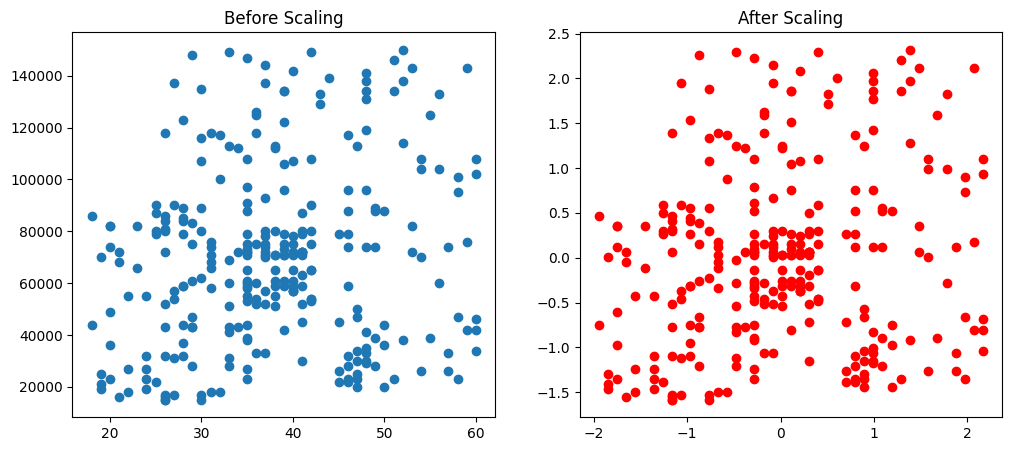

In [31]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

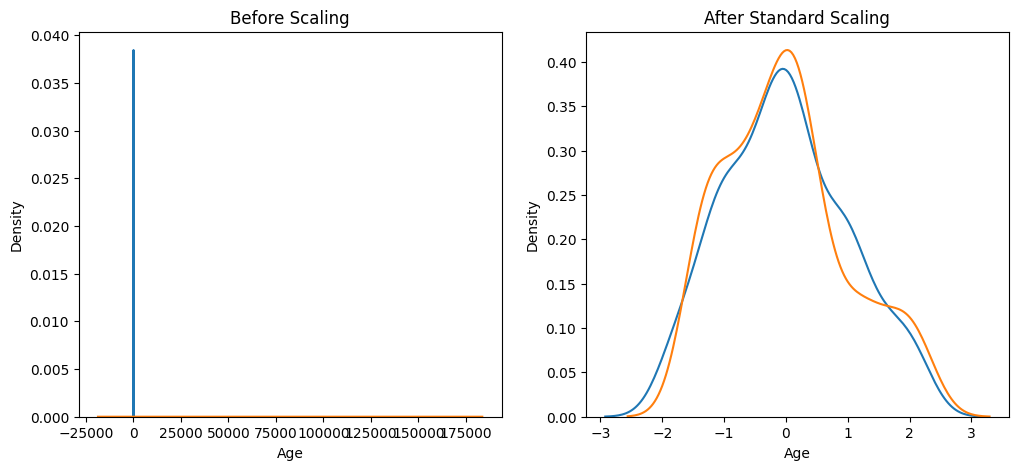

In [32]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

In [ ]:
# Comparison of Distributions

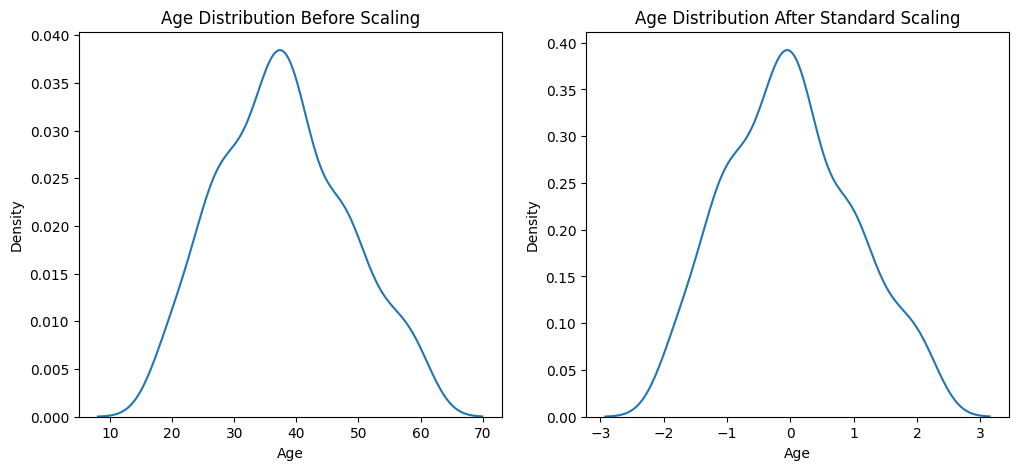

In [33]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

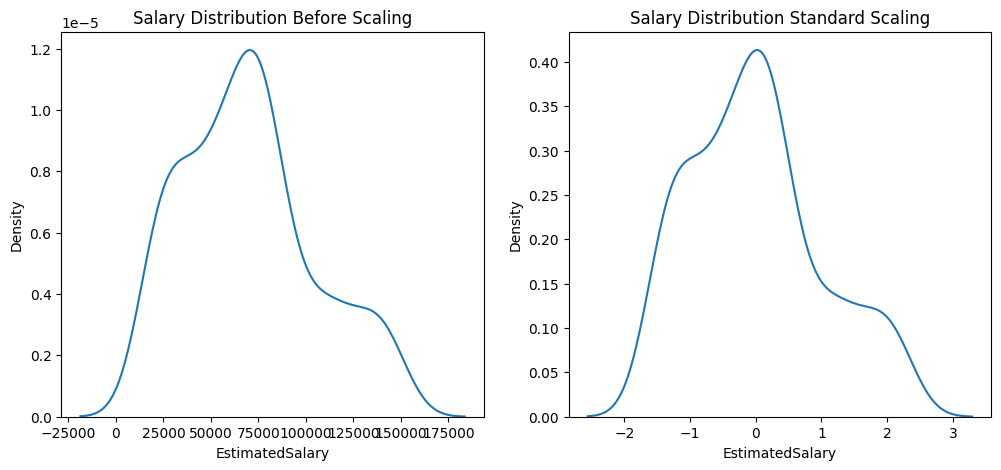

In [34]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

In [ ]:
# Why scaling is important?

In [35]:
from sklearn.linear_model import LogisticRegression


In [36]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [37]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [60]:
# LogisticRegression()
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [61]:
from sklearn.metrics import accuracy_score

In [62]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.8429752066115702
Scaled 0.8429752066115702


In [41]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [64]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [44]:
# DecisionTreeClassifier()

In [65]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [66]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.8760330578512396
Scaled 0.8760330578512396


In [47]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [48]:
# Effect of Outlier

In [53]:
import pandas as pd

df = pd.concat(
    [df, pd.DataFrame({
        'Age': [5, 90, 95],
        'EstimatedSalary': [1000, 250000, 350000],
        'Purchased': [0, 1, 1]
    })],
    ignore_index=True
)

In [54]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


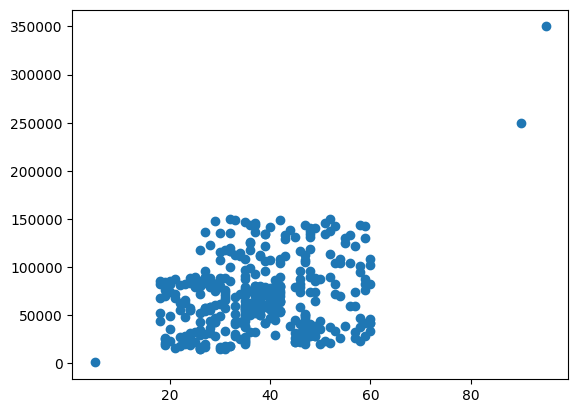

In [55]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((282, 2), (121, 2))

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [58]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

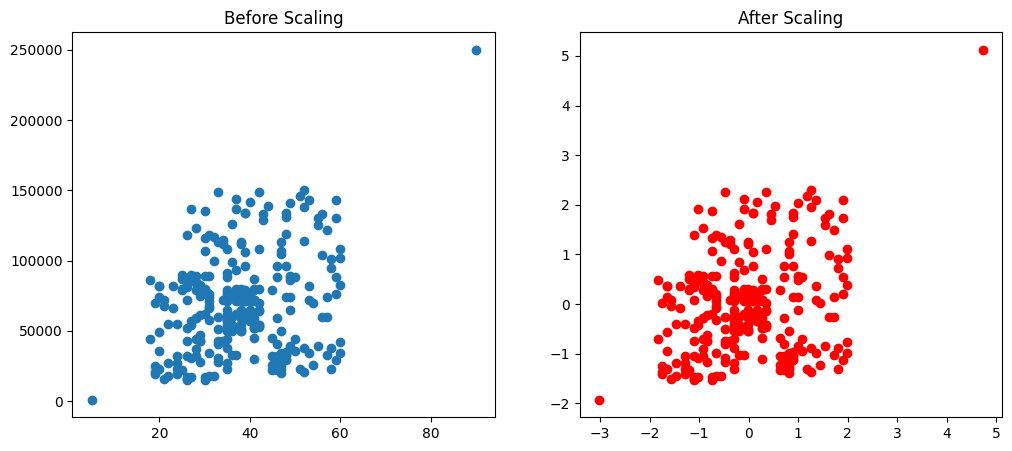

In [59]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()